In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [3]:
gdp_df.shape

(7662, 4)

7662 rows
4 columns

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Country or Area  =  object
***
Year = int64
***
Value = float64
***
Value Footnotes = float64

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [8]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [9]:
gdp_df.isna().any()

Country           False
Year              False
GDP_Per_Capita    False
dtype: bool

In [10]:
gdp_df.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Length: 7662, dtype: bool

In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
9. What was the median GDP per capita value in 2020?

In [13]:
gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020]

1        1968.341002
22       3455.023119
55       3957.933804
88      13278.369769
121     10844.770764
            ...     
7503    10450.622382
7536     5402.538773
7565    16204.169107
7598     3183.650773
7631     1990.319419
Name: GDP_Per_Capita, Length: 242, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

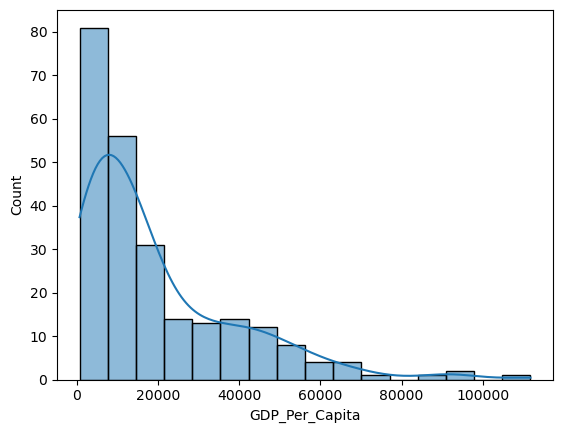

In [14]:
sns.histplot(gdp_df["GDP_Per_Capita"].loc[gdp_df.Year == 2020], kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

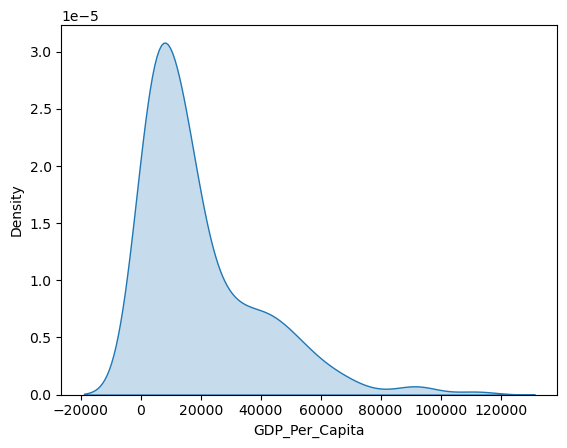

In [15]:
sns.kdeplot(gdp_df["GDP_Per_Capita"].loc[gdp_df.Year == 2020], fill=True)
plt.show

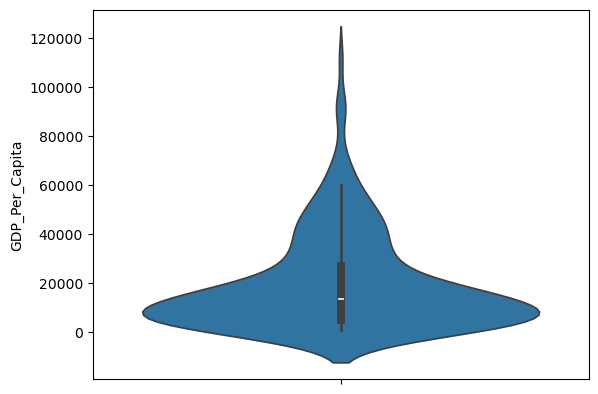

In [16]:
sns.violinplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

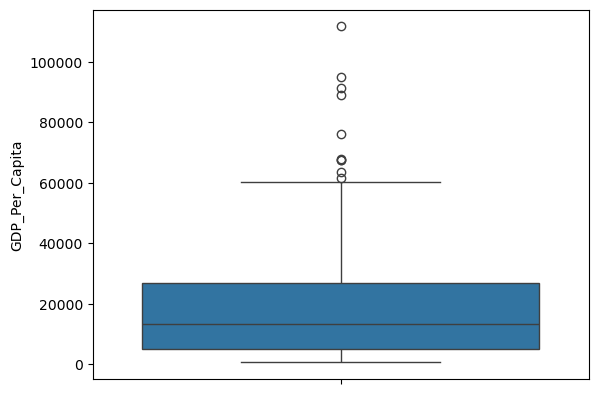

In [17]:
sns.boxplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

In [18]:
import statistics as stats
stats.median(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])

13357.997573370474

In [19]:
gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 1990]

52      3037.297466
85      2788.301039
118     4827.027705
151     8828.874473
184     5793.084512
           ...     
7500    2774.138350
7533    2099.394649
7595    9705.981267
7628    2290.039226
7661    2704.757299
Name: GDP_Per_Capita, Length: 207, dtype: float64

In [20]:
data1990 = gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 1990].reset_index(drop = True)
data2000 = gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2000].reset_index(drop = True)
data2010 = gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2010].reset_index(drop = True)
data2020 = gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2010].reset_index(drop = True)

In [38]:
df_1990 = pd.DataFrame(data1990)
df_2000 = pd.DataFrame(data2000)
df_2010 = pd.DataFrame(data2010)
df_2020 = pd.DataFrame(data2020)

In [46]:
gdp_decades = pd.DataFrame()
gdp_decades['1990'] = df_1990
gdp_decades['2000'] = df_2000
gdp_decades['2010'] = df_2010
gdp_decades['2020'] = df_2020
gdp_decades.head()

,1990,2000,2010,2020
0,3037.297466,2897.140841,2026.163818,2026.163818
1,2788.301039,2671.599188,3513.315920,3513.315920
2,4827.027705,5892.582191,3737.506710,3737.506710
3,8828.874473,8786.190350,10749.466426,10749.466426
4,5793.084512,4728.374368,11007.746606,11007.746606


	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

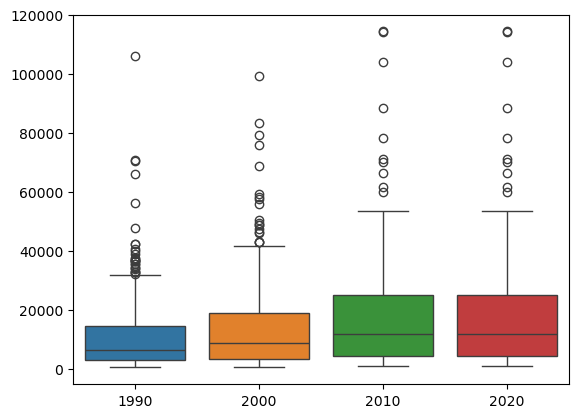

In [50]:
sns.boxplot(gdp_decades)
plt.show()

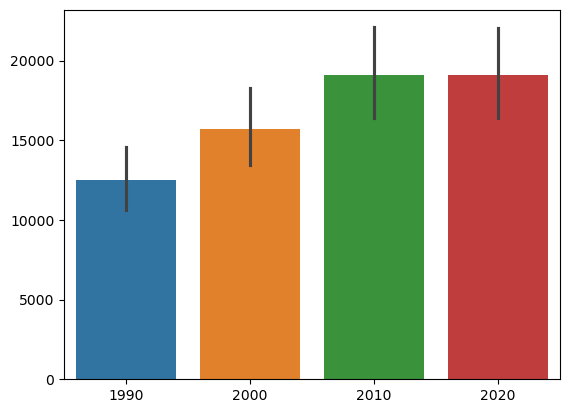

In [56]:
sns.barplot(gdp_decades);

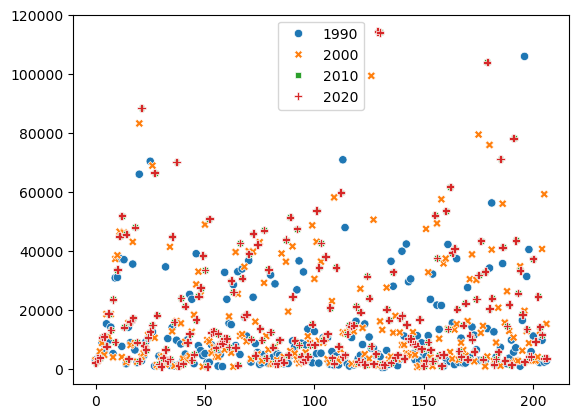

In [74]:
sns.scatterplot(x = gdp_decades['1990', '2000', '2010', '2020'], y = )
plt.show()

In [68]:
sns.regplot(gdp_decades,
    line_kws={"color": "red", "linewidth": 1.5}
)

ValueError: need at least one array to concatenate